In [268]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; 
plt.style.use('seaborn-whitegrid')

flagstat = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/counts/flagstat/flagstat_summary.txt"

counts = "/Users/annasintsova/git_repos/"\
        "HUTI-RNAseq/data/get_homologs_output/"\
        "C50_S90_e0_/run_C50_S90_e0__pan_C50_S90/2018-02-26_pangenome_matrix_t0_crossRef.csv"
        
out_dir = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/resource_allocation"



In [269]:
with open ("/Users/annasintsova/git_repos/HUTI-RNAseq/"\
           "results/resource_allocation/"\
           "2018-04-16_eco_ribosomal_subunit.kegg.results", "r") as fh:
    ribosome_genes = [line.split()[0].rstrip().split(":")[1].strip() for line in fh]
    
with open ("/Users/annasintsova/git_repos/HUTI-RNAseq/"\
           "results/resource_allocation/"\
           "2018-04-13_crp_activator_info.tab", "r") as fh:
    crp_genes = [line.split()[0].rstrip() for line in fh]

In [270]:
def add_col_sum(df):
    df2 = df.T
    df2['col_sum'] = df.sum(axis=0)
    return df2.T
    

In [271]:
cnts = pd.read_csv(counts)
to_keep = [c for c in cnts.columns if 'counts' in c and 'seq' not in c] + ["MG1655"]
counts2 = cnts[to_keep]
counts3 = counts2.dropna()
counts3.set_index("MG1655", inplace=True)
counts3.head()
sum_counts = counts3.sum(axis=0)
counts4 = counts3.T
counts4['total'] = counts3.sum(axis=0)
counts5 = counts4.T
counts5.tail()

,HM01_UR_counts,HM01_UTI_counts,HM03_UR_counts,HM03_UTI_counts,HM06_UR_counts,HM06_UTI_counts,HM07_UR_counts,HM07_UTI_counts,HM14_UR_counts,HM14_UTI_counts,...,HM57_UR_counts,HM57_UTI_counts,HM60_UR_counts,HM60_UTI_counts,HM68_UR_counts,HM68_UTI_counts,HM66_UR_counts,HM66_UTI_counts,HM86_UR_counts,HM86_UTI_counts
MG1655,,,,,,,,,,,,,,,,,,,,,
b4398,966.0,157.0,407.0,120.0,1053.0,61.0,519.0,29.0,338.0,121.0,...,580.0,26.0,208.0,17.0,942.0,64.0,437.0,6.0,489.0,110.0
b4400,127.0,113.0,158.0,21.0,521.0,43.0,245.0,22.0,171.0,22.0,...,194.0,20.0,96.0,11.0,203.0,22.0,133.0,6.0,170.0,23.0
b4401,7732.0,331.0,11831.0,931.0,9084.0,275.0,15496.0,188.0,11878.0,2542.0,...,5864.0,115.0,4044.0,75.0,2131.0,284.0,3584.0,9.0,3779.0,729.0
b4403,635.0,96.0,1193.0,368.0,809.0,139.0,1641.0,78.0,1027.0,842.0,...,747.0,37.0,457.0,38.0,1304.0,127.0,519.0,5.0,547.0,200.0
total,8455636.0,2339375.0,11741588.0,5060740.0,12079025.0,2674526.0,11231445.0,1149375.0,11601756.0,8090208.0,...,9829208.0,499668.0,6874228.0,385855.0,9128519.0,1327436.0,7794314.0,36144.0,7362565.0,3550816.0


In [272]:
ribosome_counts = counts5.loc[ribosome_genes]
ribosome_counts = add_col_sum(ribosome_counts)
crp_counts = counts5.loc[crp_genes]
crp_counts = add_col_sum(crp_counts)

In [273]:
counts5.loc["total"]
ribosome_counts.loc["col_sum"]

HM01_UR_counts      452127.0
HM01_UTI_counts     608400.0
HM03_UR_counts      644395.0
HM03_UTI_counts    1399005.0
HM06_UR_counts      965260.0
HM06_UTI_counts     511732.0
HM07_UR_counts      587090.0
HM07_UTI_counts     254432.0
HM14_UR_counts      640552.0
HM14_UTI_counts    2144423.0
HM17_UR_counts      814106.0
HM17_UTI_counts     264736.0
HM43_UR_counts      821941.0
HM43_UTI_counts    1105506.0
HM54_UR_counts      730129.0
HM54_UTI_counts     859733.0
HM56_UR_counts      764434.0
HM56_UTI_counts    2591502.0
HM57_UR_counts      538784.0
HM57_UTI_counts     125328.0
HM60_UR_counts      479794.0
HM60_UTI_counts      92943.0
HM68_UR_counts      586606.0
HM68_UTI_counts     301281.0
HM66_UR_counts      609423.0
HM66_UTI_counts       7284.0
HM86_UR_counts      688329.0
HM86_UTI_counts     910644.0
Name: col_sum, dtype: float64

In [274]:
totals =  pd.DataFrame({'Total': counts5.loc["total"],'R':ribosome_counts.loc["col_sum"],
                        'C': crp_counts.loc["col_sum"]})
totals["C%"] = round(totals["C"]/totals["Total"]*100,2)
totals["R%"] = round(totals["R"]/totals["Total"]*100,2)
totals['condition'] = [c.split("_")[1] for c in totals.index]
totals

,C,R,Total,C%,R%,condition
HM01_UR_counts,2221907.0,452127.0,8455636.0,26.28,5.35,UR
HM01_UTI_counts,257224.0,608400.0,2339375.0,11.00,26.01,UTI
HM03_UR_counts,2553359.0,644395.0,11741588.0,21.75,5.49,UR
HM03_UTI_counts,640723.0,1399005.0,5060740.0,12.66,27.64,UTI
HM06_UR_counts,2480034.0,965260.0,12079025.0,20.53,7.99,UR
HM06_UTI_counts,296495.0,511732.0,2674526.0,11.09,19.13,UTI
HM07_UR_counts,2146501.0,587090.0,11231445.0,19.11,5.23,UR
HM07_UTI_counts,131125.0,254432.0,1149375.0,11.41,22.14,UTI
HM14_UR_counts,2779913.0,640552.0,11601756.0,23.96,5.52,UR
HM14_UTI_counts,1069506.0,2144423.0,8090208.0,13.22,26.51,UTI


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b63b710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112ef7048>], dtype=object)

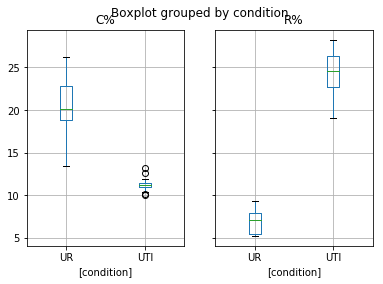

In [70]:
totals[["C%", "R%", "condition"]].boxplot(by = "condition")

In [282]:
flag = pd.read_csv(flagstat, index_col=0)
flag.index = [f.split("_trimmed")[0]+"_counts" for f in flag.index]
mapped = flag.loc[totals.index]['mapped']
totals['mapped'] = mapped
totals['core'] = round(totals["Total"]/totals['mapped']*100, 2)

In [283]:
catabolic_urine = pd.DataFrame({"sample":["CAT|UR"]*14, "% allocated":totals[totals["condition"] == "UR"]["C%"]})
cataboli_uti = pd.DataFrame({"sample":["CAT|UTI"]*14, "% allocated": totals[totals["condition"] == "UTI"]["C%"]})
ribosome_uti = pd.DataFrame({"sample":["RIB|UTI"]*14, "% allocated": totals[totals["condition"] == "UTI"]["R%"]})
ribosome_urine = pd.DataFrame({"sample":["RIB|UR"]*14, "% allocated": totals[totals["condition"] == "UR"]["R%"]})
core_urine = pd.DataFrame({"sample": ["CORE|UR"]*14, "% allocated":totals[totals["condition"] == "UR"]["core"]})
core_uti =pd.DataFrame({"sample": ["CORE|UTI"]*14, "% allocated":totals[totals["condition"] == "UTI"]["core"]})
final = pd.concat([cataboli_uti, catabolic_urine, ribosome_uti, ribosome_urine, core_urine, core_uti])
final.head()
catabolism = pd.concat([catabolic_urine, cataboli_uti])
ribosome = pd.concat([ribosome_urine, ribosome_uti])
core = pd.concat([core_urine, core_uti])

In [281]:
core

,% allocated,sample
HM01_UR_counts,0.51,CORE|UR
HM03_UR_counts,0.56,CORE|UR
HM06_UR_counts,0.53,CORE|UR
HM07_UR_counts,0.54,CORE|UR
HM14_UR_counts,0.54,CORE|UR
HM17_UR_counts,0.53,CORE|UR
HM43_UR_counts,0.57,CORE|UR
HM54_UR_counts,0.48,CORE|UR
HM56_UR_counts,0.56,CORE|UR
HM57_UR_counts,0.52,CORE|UR


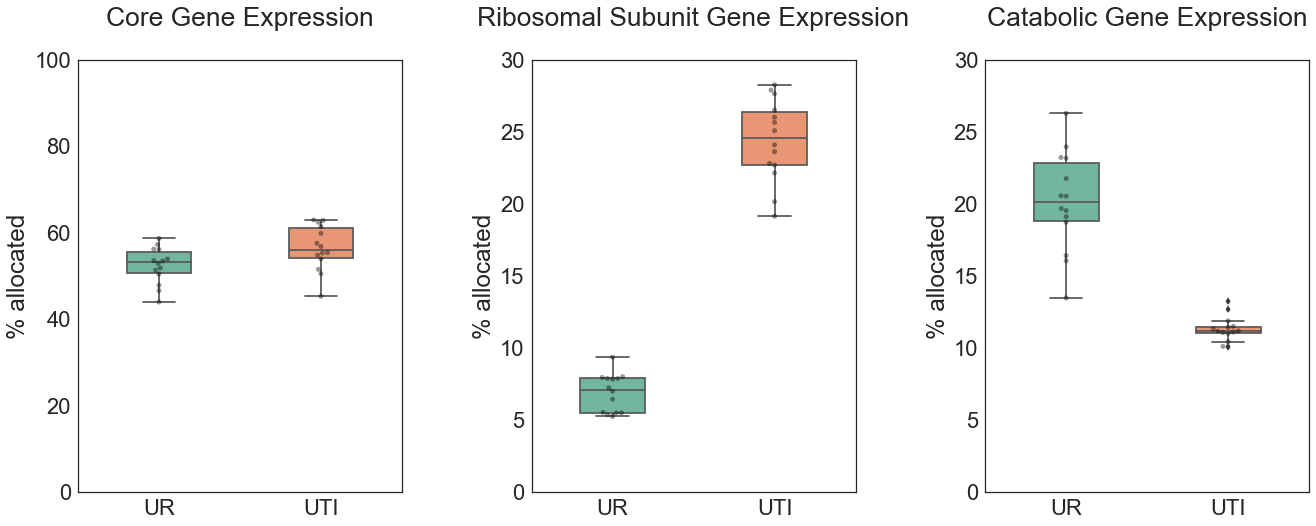

In [294]:
fig = plt.figure(figsize=(9,5))

sns.set(font_scale = 2.2)
sns.set_style("white")
# Catabolic Gene Expression
ax1 = fig.add_axes([0.1, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 100))
sns.boxplot(x = "sample", y = "% allocated", palette="Set2",data = core,width=0.4)
sns.swarmplot(x = "sample", y = "% allocated", data = core, color = 'black', alpha = 0.4)
ax1.set_title("Core Gene Expression\n")
ax1.set_xticklabels(["UR", "UTI"])
ax1.set_xlabel("")

# Ribosome Subunits Gene Expression

ax2 = fig.add_axes([0.8, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 30))
sns.boxplot(x = "sample", y = "% allocated",palette="Set2", data = ribosome, width=0.4)
sns.swarmplot(x = "sample", y = "% allocated", data =ribosome, color = 'black', alpha = 0.4)
ax2.set_title("Ribosomal Subunit Gene Expression\n")
ax2.set_xticklabels(["UR", "UTI"])
ax2.set_xlabel("")

# Core Gene Expression

ax3 = fig.add_axes([1.5, 0.5, 0.5, 1.2],
                    xticklabels=[], ylim=(0, 30))
sns.boxplot(x = "sample", y = "% allocated", palette="Set2", data = catabolism, width=0.4)
sns.swarmplot(x = "sample", y = "% allocated", data =catabolism, color = 'black', alpha = 0.4)
ax3.set_title("Catabolic Gene Expression\n")
ax3.set_xticklabels(["UR", "UTI"])
ax3.set_xlabel("")

fig.savefig(os.path.join(out_dir, "resource_reallocation.png"),bbox_inches='tight',dpi=300 )

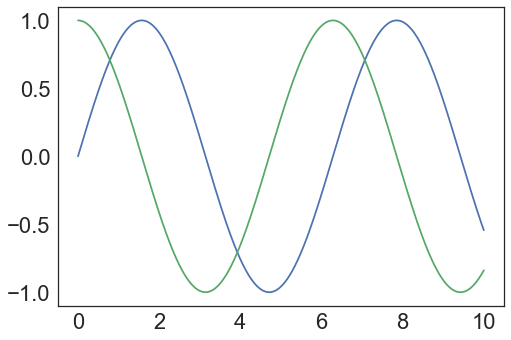

In [265]:
x = np.linspace(0, 10, 1000)
fig = plt.figure()
ax = plt.axes()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

In [127]:
final1 = pd.DataFrame(totals["C%"])
final1['metabolism'] = ["C"]*28
final1.columns = ["% allocated", "metabolism"]
final1["condition"] = [c.split("_")[1] for c in final1.index]
final2 =pd.DataFrame(totals["R%"])
final2["metabolism"] = ["R"]*28
final2.columns = ["% allocated", "metabolism"]
final2["condition"] = [c.split("_")[1] for c in final2.index]
final3 = pd.DataFrame(totals["core"])
final3["metabolism"] = ["core"]*28
final3.columns = ["% allocated", "metabolism"]
final3["condition"] = [c.split("_")[1] for c in final3.index]
#final = pd.DataFrame(final, columns=[""])
#final["condition"] = [c.split("_")[1] for c in final.index]
final = pd.concat([final1, final2, final3])
final["condition"] = [c.split("_")[1] for c in final.index]
final

,% allocated,metabolism,condition
HM01_UR_counts,26.28,C,UR
HM01_UTI_counts,11.00,C,UTI
HM03_UR_counts,21.75,C,UR
HM03_UTI_counts,12.66,C,UTI
HM06_UR_counts,20.53,C,UR
HM06_UTI_counts,11.09,C,UTI
HM07_UR_counts,19.11,C,UR
HM07_UTI_counts,11.41,C,UTI
HM14_UR_counts,23.96,C,UR
HM14_UTI_counts,13.22,C,UTI


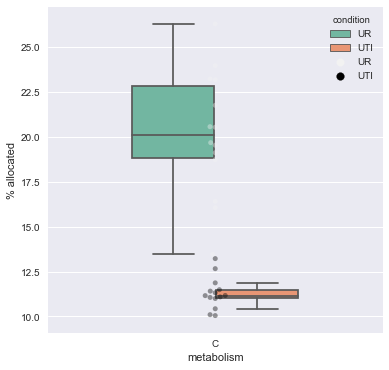

In [132]:
plt.figure(figsize=(6,6))

ax = sns.boxplot(x = 'metabolism', y = "% allocated", data = final1, hue = "condition", palette="Set2", width=.5, showfliers=False)
ax = sns.swarmplot(x = "metabolism", y = "% allocated", data = final1, hue = 'condition',color = 'black', alpha = 0.4)

//anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


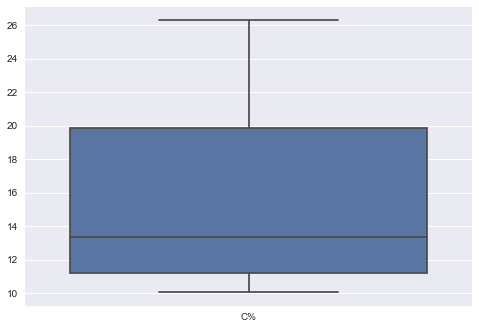

In [125]:
ax = sns.boxplot(totals[["C%", "condition"]])

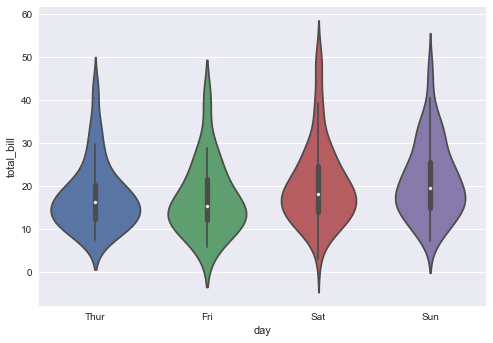

In [90]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [91]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
